# AIRBNB DATA ANALYSIS FOR TORONTO/CANADA

In [2]:
# IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### BUSINESS UNDERSTANDING

In this notebook we'll be exploring the data from AirBnb Barcelona dataset http://insideairbnb.com/get-the-data.html published in year 2019. Datasets involves insights of interest related to prices, neigbourhoods, avalability or room types in the city.

In recent years, I came across people who plans to go Toronto with various reasons. This reasons are mostly for studying, settling, working. And some of them was travelling or short term seminars or training courses. So there are people who wants to choose where to stay for long or short terms. And I am also in the group for long term staying. So I decided to analyze Toronto data for everyone and tried to answer mostly general questions below which everyone wants to know about before renting Airbnb house.


1) Which districts have most alternative for different style of houses, where are the Airbnb guests clusters?

2) Where the clients mostly looking a house for renting, what are the most popular districts for users?

3) What is the map looks like when seperating the districts? Is it possible to see which locations of most popular 2 districts have the most reviews? Which locations of most popular 2 districts are cheaper then the rest? (On City Map)

4) What is the distribution of room types by districts, and how is it looks in map? 

5) Can we analyze all mean prices according to room types seperatly and district by district?

6) Which moths are the most expensive months? When clients startes to search their target Airbnb, what are the most popular months for clients, and can we compare it for 2 years?


For answering these questions, I created this notebook with visualizations.. If Airbnb publishs new data or update the data below, you can still use this notebook to analyse new/updated dataset.

Let's start with loading datas..

In [3]:
# LOADING DATAS

calendar=pd.read_csv('calendar.csv')
listing=pd.read_csv('listings.csv')
reviews=pd.read_csv('reviews.csv')
neighbourhoods=pd.read_csv('neighbourhoods.csv')

In [4]:
listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,2017-12-04,0.13,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,99,180,169,2013-08-27,1.35,2,0
2,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.66724,-79.41598,Private room,66,1,0,NaN,NaN,1,0
3,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,1,215,2019-10-27,1.85,2,13
4,26654,World Class downtown @CN Tower Theatre MTCC ga...,113345,Adela,NaN,Waterfront Communities-The Island,43.64530,-79.38940,Entire home/apt,199,4,38,2019-08-17,0.35,7,336


In [5]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,291699,2019-12-08,t,$34.00,$34.00,80.0,90.0
1,1419,2019-12-08,f,$469.00,$469.00,4.0,730.0
2,1419,2019-12-09,f,$469.00,$469.00,4.0,730.0
3,1419,2019-12-10,f,$469.00,$469.00,4.0,730.0
4,1419,2019-12-11,f,$469.00,$469.00,4.0,730.0


In [6]:
calendar.shape

(8539992, 7)

I want to make 'neighbourhood classification' for enable to see all in one map. 
So, because of the data is missing for what I wanna see, I needed to import district names manually.
I took region names from wikipedia

In [7]:
Downtown_Core = [
'Alexandra Park','Annex','Baldwin Village',
'Cabbagetown','CityPlace','Chinatown','Church and Wellesley','Corktown','Discovery District','Distillery District',
'The Entertainment District','East Bayfront','Fashion District','Financial District','Garden District',
'Grange Park','Harbord Village','Harbourfront','Kensington Market','Little Japan','Moss Park','Old Town',
'Quayside','Queen Street West','Regent Park','South Core','St. James Town','St. Lawrence','Toronto Islands',
'Trefann Court','University (includes Huron–Sussex)','Yorkville',
'Waterfront Communities-The Island',
'Church-Yonge Corridor','Kensington-Chinatown','Cabbagetown-South St.James Town','University',
'North St.James Town'
    
]

East_End = [
'The Beaches','The Beach','East Chinatown','East Danforth',
'Gerrard Street East', 'Gerrard India Bazaar', 'Little India','Greektown','Danforth',
'Leslieville','Main Square','Playter Estates','Port Lands', 'Villiers Island','Riverdale','Upper Beaches',
'Bay Street Corridor','Woodbine Corridor','South Riverdale','East Riverdale','Danforth East York',
'Playter Estates-Danforth','North Riverdale','Blake-Jones','East End-Danforth'
]

North_End = [
'Bedford Park','Casa Loma','Chaplin Estates','Davisville Village','Deer Park', 'Yonge', 'St. Clair',
'Forest Hill', 'Forest Hill Village', 'Upper Village','Lawrence Park','Lytton Park','Midtown','Moore Park',
'North Toronto','Rosedale','South Hill', 'Rathnelly','Summerhill','Uptown','Wanless Park','Wychwood Park',
'Yonge–Eglinton', 'Midtown Toronto',
'Rosedale-Moore Park','Yonge–Eglinton','Wychwood Park','Wychwood Park','Mount Pleasant West',
'Mount Pleasant East','Lawrence Park South','Lawrence Park North','Forest Hill South','Forest Hill North',
'Wychwood','Bedford Park-Nortown'
]


In [8]:
West_End = [
'Beaconsfield Village','Bloor West Village','Bracondale Hill','Brockton Village','Carleton Village',
'Corso Italia','Davenport','Dovercourt Park','Dufferin Grove','Earlscourt','Fort York','High Park',
'The Junction', 'West Toronto', 'Dundas Street', 'Little Malta','Junction Triangle',
'Koreatown','Liberty Village','Little Italy','Little Portugal','Little Tibet','Mirvish Village',
'Niagara','Palmerston','Parkdale','Queen Street West','Regal Heights',
'Roncesvalles','Runnymede','Seaton Village','Swansea','Trinity–Bellwoods','Wallace Emerson',
'South Parkdale','Palmerston-Little Italy',
'Dovercourt-Wallace Emerson-Junction','Corso Italia-Davenport','High Park-Swansea','Trinity-Bellwoods',
'Weston-Pellam Park','Runnymede-Bloor West Village','Junction Area'
]

East_York = [
'Broadview North','Crescent Town','East Danforth','Pape Village','Woodbine Heights',
'Bermondsey','Governor s Bridge','Leaside','O Connor–Parkview','Thorncliffe Park',
'Greenwood-Coxwell','Woodbine Heights','Woodbine-Lumsden','Taylor-Massey','Old East York',
"O'Connor-Parkview",'Leaside-Bennington'
]

Etobicoke = [
'Alderwood','Centennial Park','Clairville','Eatonville', 'Etobicoke West Mall','The Elms',
'Eringate','Humber Bay','Humber Heights – Westmount','Humber Valley Village','Humberwood',
'Islington–City Centre West','Kingsview Village', 'The Westway','The Kingsway','Long Branch',
'Markland Wood','Mimico','New Toronto','Princess Gardens','Rexdale','Richview','Smithfield',
'Stonegate-Queensway','Sunnylea','Thistletown','Thorncrest Village','West Humber-Clairville',
'West Deane Park','Willowridge',
'Islington-City Centre West','Elms-Old Rexdale','Rexdale-Kipling','Yonge-Eglinton','Yonge-St.Clair',
'Willowridge-Martingrove-Richview','Thistletown-Beaumond Heights','Princess-Rosethorn',
'Mount Olive-Silverstone-Jamestown','Mimico (includes Humber Bay Shores)','Kingsway South',
'Kingsview Village-The Westway','Humber Heights-Westmount','Humber Heights-Westmount',
'Eringate-Centennial-West Deane','Humber Heights-Westmount','Edenbridge-Humber Valley'
]


In [9]:
North_York= [
'Amesbury','Armour Heights','Bathurst Manor','Bayview Village','Bayview Woods-Steeles','Bermondsey',
'Black Creek','The Bridle Path','Clanton Park', 'Wilson Heights','Don Mills','Don Valley Village',
'Downsview','Flemingdon Park','Glen Park', 'Yorkdale', 'Glen Park', 'Englemount', 'Marlee Village',
'Henry Farm','Hillcrest Village','Hoggs Hollow','Humber Summit','Humbermede', 'Emery',
'Jane and Finch', 'University Heights', 'Elia','Lansing','Lawrence Heights','Lawrence Manor',
'Ledbury Park','Maple Leaf','Newtonbrook','North York City Centre','Parkway Forest','Parkwoods',
'The Peanut','Pelmo Park', 'Humberlea','Pleasant View','Uptown Toronto','Victoria Village','Westminster–Branson',
'Willowdale','York Mills','York University Heights', 'Village at York','Banbury-Don Mills' ,'Yorkdale-Glen Park',
'Willowdale East','Willowdale West','Westminster-Branson','St.Andrew-Windfields','Pelmo Park-Humberlea',
'Parkwoods-Donalda','Newtonbrook West','Newtonbrook East','Lansing-Westgate','Glenfield-Jane Heights',
'Glenfield-Jane Heights','Englemount-Lawrence','Glenfield-Jane Heights','Willowdale West','Willowdale East',
'Westminster-Branson','St.Andrew-Windfields','Rustic','Pelmo Park-Humberlea','Parkwoods-Donalda',
'Bridle Path-Sunnybrook-York Mills','Brookhaven-Amesbury','Downsview-Roding-CFB'

]

Scarborough= [
'Agincourt','Armadale','Bendale', 'Cedarbrae','Birch Cliff','Birch Cliff Heights','Brown s Corners',
'Clairlea','Cliffside','Cliffcrest','Dorset Park','Eglinton East','Golden Mile','Guildwood','Highland Creek',
'Ionview', "L'Amoreaux" ,'Malvern','Maryvale','Milliken','Morningside','Morningside Heights','Oakridge',
'Port Union', 'Centennial Scarborough','Rouge','Scarborough City Centre','Scarborough Junction',
'Scarborough Village','Steeles','Tam O Shanter','Sullivan','West Hill','West Rouge','Wexford','Woburn',
'Wexford/Maryvale','Agincourt North','Agincourt South-Malvern West','Agincourt','Agincourt North',
'Tam OShanter-Sullivan','Kennedy Park','Birchcliffe-Cliffside','Clairlea-Birchmount'

]

York= [
'Baby Point',
'Briar Hill','Belgravia',
'Eglinton West', 'Little Jamaica',
'Fairbank', 'Caledonia','Fairbank',
'Humewood–Cedarvale',  'Upper Village', 'Forest Hill',
'Lambton',
'Mount Dennis',
'Oakwood–Vaughan', 'Oakwood Village', 'Five Points', 'Northcliffe',
'Old Mill',
'Rockcliffe–Smythe',
'Silverthorn' ,'Keelesdale',
'Tichester',
'Weston',
'Briar Hill-Belgravia',
'Rockcliffe-Smythe',
'High Park North','Rustic',
'Lambton Baby Point',
'Keelesdale-Eglinton West','Humewood-Cedarvale','Beechborough-Greenbrook','Caledonia-Fairbank'
]

In [10]:
dictDowntown=dict()
dictEastend=dict()
dictNorthend=dict()

dictWestend=dict()
dictEastyork=dict()
dictEtobicoke=dict()

dictNorthyork=dict()
dictScarborough=dict()
dictYork=dict()


for i in Downtown_Core:
    dictDowntown[i]="Downtown_Core"

for i in East_End:
    dictEastend[i]="East_End"

for i in North_End:
    dictNorthend[i]="North_End"
    
for i in West_End:
    dictWestend[i]="West_End"

for i in East_York:
    dictEastyork[i]="East_York"

for i in Etobicoke:
    dictEtobicoke[i]="Etobicoke"
    
for i in North_York:
    dictNorthyork[i]="North_York"
    
for i in Scarborough:
    dictScarborough[i]="Scarborough"
    
for i in York:
    dictYork[i]="York"
    
    
for i in range(len(listing)):
    
    if listing["neighbourhood"][i] in dictDowntown:
        listing["neighbourhood_group"][i] = "Downtown Core"
    elif listing["neighbourhood"][i] in dictEastend:
        listing["neighbourhood_group"][i] = "East End"
    elif listing["neighbourhood"][i] in dictNorthend:
        listing["neighbourhood_group"][i] = "North End"
        
        
    elif listing["neighbourhood"][i] in dictWestend:
        listing["neighbourhood_group"][i] = "West End"
    elif listing["neighbourhood"][i] in dictEastyork:
        listing["neighbourhood_group"][i] = "East York"
    elif listing["neighbourhood"][i] in dictEtobicoke:
        listing["neighbourhood_group"][i] = "Etobicoke"
        
    elif listing["neighbourhood"][i] in dictNorthyork:
        listing["neighbourhood_group"][i] = "North York"
    elif listing["neighbourhood"][i] in dictScarborough:
        listing["neighbourhood_group"][i] = "Scarborough"
    elif listing["neighbourhood"][i] in dictYork:
        listing["neighbourhood_group"][i] = "York"
        
        
    else:
        listing["neighbourhood_group"][i] = 0

/Users/alisurmeli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/alisurmeli/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/alisurmeli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/alisur

# DATA PREPARING

In [11]:

for i in range(len(neighbourhoods)):
    
    if neighbourhoods["neighbourhood"][i] in dictDowntown:
        neighbourhoods["neighbourhood_group"][i] = "Downtown Core"
    elif neighbourhoods["neighbourhood"][i] in dictEastend:
        neighbourhoods["neighbourhood_group"][i] = "East End"
    elif neighbourhoods["neighbourhood"][i] in dictNorthend:
        neighbourhoods["neighbourhood_group"][i] = "North End"  
        
    elif neighbourhoods["neighbourhood"][i] in dictWestend:
        neighbourhoods["neighbourhood_group"][i] = "West End"
    elif neighbourhoods["neighbourhood"][i] in dictEastyork:
        neighbourhoods["neighbourhood_group"][i] = "East York"
    elif neighbourhoods["neighbourhood"][i] in dictEtobicoke:
        neighbourhoods["neighbourhood_group"][i] = "Etobicoke"
        
    elif neighbourhoods["neighbourhood"][i] in dictNorthyork:
        neighbourhoods["neighbourhood_group"][i] = "North York"
    elif neighbourhoods["neighbourhood"][i] in dictScarborough:
        neighbourhoods["neighbourhood_group"][i] = "Scarborough"
    elif neighbourhoods["neighbourhood"][i] in dictYork:
        neighbourhoods["neighbourhood_group"][i] = "York"
        
    else:
        neighbourhoods["neighbourhood_group"][i] = 0

/Users/alisurmeli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
# District Scarborough data is broken, so we will change it manually.

In [13]:
neighbourhoods['neighbourhood_group'].isin([0]).sum()

1

In [14]:
neighbourhoods['neighbourhood_group'][114:115]="Scarborough"

In [15]:
neighbourhoods['neighbourhood_group'].isin([0]).sum()

0

In [16]:
# Now it's ok!
# But there are still some districts where not be assigned!
# Let's see them..

In [17]:
listing['neighbourhood_group'].isin([0]).sum()

102

In [18]:
listing[listing['neighbourhood_group'].isin([0])]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1022,4020844,Location is everything!,20845776,Tonia,0,Tam O'Shanter-Sullivan,43.78345,-79.28930,Entire home/apt,107,1,0,NaN,NaN,1,0
1208,4687194,Cozy 3 Bedroom + 2 Bath House Apartment,24233876,Aili & Don,0,Tam O'Shanter-Sullivan,43.78096,-79.31224,Entire home/apt,121,5,98,2019-11-04,1.62,5,156
1929,6571733,"Quiet Area, yet Close to the Action",34372245,D,0,Tam O'Shanter-Sullivan,43.78093,-79.31793,Entire home/apt,60,28,56,2019-09-30,1.03,1,237
2073,6783405,"#2“锦园别墅”环境优美高雅,拥有本市旅馆不可多见的庭院景观和休闲之地",35463989,Tina,0,Tam O'Shanter-Sullivan,43.78886,-79.30717,Private room,34,1,38,2019-09-16,0.71,5,0
2106,6837258,Cozy 3 BR + 1.5 Bath House Apartment,24233876,Aili & Don,0,Tam O'Shanter-Sullivan,43.78256,-79.31409,Entire home/apt,125,5,58,2019-09-30,1.10,5,245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23081,40440126,Cass inn #1,177084561,Alice,0,Tam O'Shanter-Sullivan,43.77492,-79.30556,Private room,38,1,1,2019-12-01,1.00,13,0
23136,40473388,Cass inn #2,177084561,Alice,0,Tam O'Shanter-Sullivan,43.77720,-79.30480,Private room,45,2,0,NaN,NaN,13,172
23137,40473510,Cass inn #3,177084561,Alice,0,Tam O'Shanter-Sullivan,43.77649,-79.30579,Private room,34,2,0,NaN,NaN,13,115
23145,40475332,Cass inn #4,177084561,Alice,0,Tam O'Shanter-Sullivan,43.77538,-79.30465,Private room,29,3,0,NaN,NaN,13,35


In [19]:
# We changed 0 values to NaN values with .mask then filled NaN values with 'Scarborough'

listing['neighbourhood_group']=listing.neighbourhood_group.mask(listing.neighbourhood_group==0).fillna("Scarborough")

In [20]:
listing['neighbourhood_group'].isin([0]).sum()

0

In [21]:
# NOW WE ALL CLEAR WITH 'NEIGHBOURHOOD GROUP' COLUMN..

# DATA WRANGLING

In [22]:

#First will rename neigbourhood_group column to district in both datatsets to enable to match them up..
neighbourhoods = neighbourhoods.rename(columns={"neighbourhood_group": "district"})
listing = listing.rename(columns={"neighbourhood_group": "district"})

#There are not necessary id columns(id, host_id) neither for description columns (name, host_name)
listing = listing.drop(['name', 'host_name'], axis=1)

#Print all columns without NA values
no_nulls = set(listing.columns[listing.isnull().mean()==0])
print(no_nulls)

{'room_type', 'host_id', 'latitude', 'district', 'price', 'longitude', 'neighbourhood', 'minimum_nights', 'number_of_reviews', 'availability_365', 'calculated_host_listings_count', 'id'}


In [23]:
listing.head()

,id,host_id,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,1565,West End,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,2017-12-04,0.13,1,0
1,8077,22795,Downtown Core,Waterfront Communities-The Island,43.64105,-79.37628,Private room,99,180,169,2013-08-27,1.35,2,0
2,12604,48239,Downtown Core,Annex,43.66724,-79.41598,Private room,66,1,0,NaN,NaN,1,0
3,23691,93825,York,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,1,215,2019-10-27,1.85,2,13
4,26654,113345,Downtown Core,Waterfront Communities-The Island,43.64530,-79.38940,Entire home/apt,199,4,38,2019-08-17,0.35,7,336


In [24]:
listing.isnull().sum()

id                                   0
host_id                              0
district                             0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4390
reviews_per_month                 4390
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [25]:
nan_values=listing['last_review'].isnull().sum()/listing.shape[0]


print(nan_values)

0.18763089284951062


This is our perentage of NaN values for 'last_review' and 'reviews_per_month' on listing dataset..

We have approximately %19 missing values on'last_review' and 'reviews_per_month' columns on listing dataset..

In [26]:
listing.number_of_reviews

0          7
1        169
2          0
3        215
4         38
        ... 
23392      0
23393      0
23394      0
23395      0
23396      0
Name: number_of_reviews, Length: 23397, dtype: int64

In [27]:
# Let's make some parsing and cleaning..

# I don't wanna see adverts which 'number of reviews' less than 2..

In [28]:
listing=listing[listing.number_of_reviews >=2]
listing.shape

(17009, 14)

In [29]:
# We will create new columns from date column, we need to seperate date column to day-month-year columns.

In [30]:
listing['year'] = pd.DatetimeIndex(listing['last_review']).year
listing['month'] = pd.DatetimeIndex(listing['last_review']).month
listing['day'] = pd.DatetimeIndex(listing['last_review']).day

NOTE: As we know, there are few adverts before 2016, there are few adverts before 2016. So it might be miscalculation with few data.

So I decided to delete datas before 2016 for better analysis

In [31]:
listing=listing[listing.year>2015]

In [32]:
listing.shape

(16852, 17)

In [33]:
# Let's check how many of airbnb advert not available even one day..
listing[listing.availability_365==0]

,id,host_id,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,1419,1565,West End,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,2017-12-04,0.13,1,0,2017,12,4
8,41887,183071,Scarborough,Oakridge,43.69466,-79.28667,Entire home/apt,69,2,82,2019-09-02,2.22,2,0,2019,9,2
11,45399,195095,Downtown Core,Church-Yonge Corridor,43.65972,-79.38172,Entire home/apt,121,1,78,2019-11-07,0.70,12,0,2019,11,7
14,50110,195095,Downtown Core,Church-Yonge Corridor,43.66899,-79.38548,Entire home/apt,121,1,55,2019-10-23,0.50,12,0,2019,10,23
20,69464,195095,North End,Rosedale-Moore Park,43.67094,-79.38581,Entire home/apt,121,1,46,2019-11-26,0.43,12,0,2019,11,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22177,39882468,271068805,East End,Blake-Jones,43.67308,-79.33529,Entire home/apt,150,1,2,2019-12-01,2.00,3,0,2019,12,1
22191,39893166,220872154,North York,Bayview Village,43.77113,-79.38462,Private room,38,1,2,2019-11-18,2.00,2,0,2019,11,18
22731,40202912,30668201,Downtown Core,Waterfront Communities-The Island,43.64452,-79.40276,Entire home/apt,99,1,3,2019-11-30,3.00,2,0,2019,11,30
22853,40267387,311051988,East End,Bay Street Corridor,43.66150,-79.38490,Entire home/apt,105,1,3,2019-12-04,3.00,1,0,2019,12,4


In [34]:
# And let's check the availability list for each airbnb advert.

listing.availability_365

0          0
3         13
4        336
7        273
8          0
        ... 
23073     71
23117     79
23177     22
23216    156
23234      1
Name: availability_365, Length: 16852, dtype: int64

In [35]:
# And now we will plot numver of districts by airbnb adv.

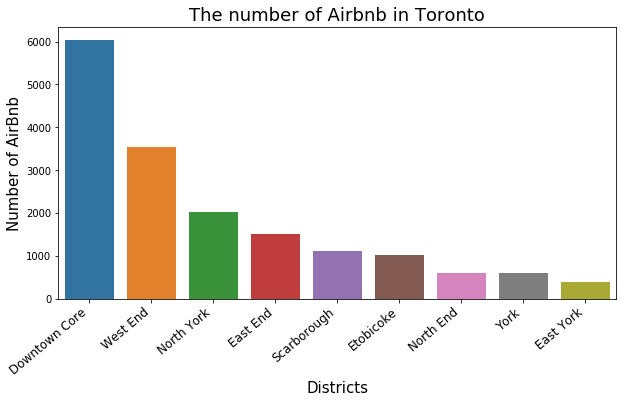

Downtown Core    6045
West End         3543
North York       2032
East End         1512
Scarborough      1104
Etobicoke        1024
North End         605
York              594
East York         393
Name: district, dtype: int64

In [36]:
#Show number of adverts by district

plt.figure(figsize = (10, 5))
ax = sns.countplot(x='district', data=listing, order = listing.district.value_counts().sort_values(ascending=False).index)
ax.set_xlabel('Districts', weight='normal', size=15)
ax.set_ylabel('Number of AirBnb', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=12)
plt.title('The number of Airbnb in Toronto', fontsize=18)

plt.show()

listing.district.value_counts().sort_values(ascending=False)

So, from 2016 to 2020 we can see most popular(most adverts) districts for airbnb hosts.

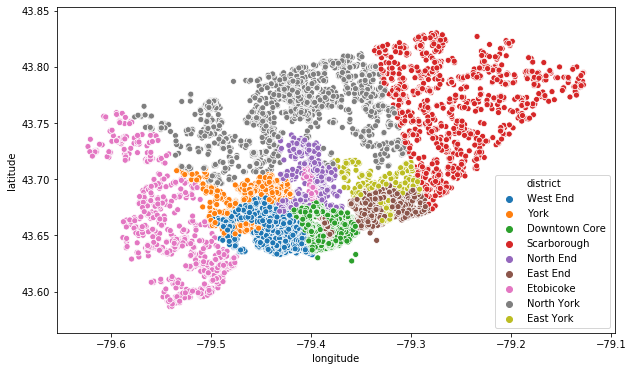

In [37]:

#Visualization of bookings in the Toronto map (according on latitude and longitude columns)


plt.figure(figsize=(10,6))
sns.scatterplot(listing.longitude,listing.latitude,hue=listing.district)
plt.ioff()


And we can see the advert maps for 9 regions in the map (with a few deviation)

In [38]:
# Now lets loot at adverts with most clicks and visualize it by district to catch up more productive search 

# First, we will groupby by district and create new dataset..

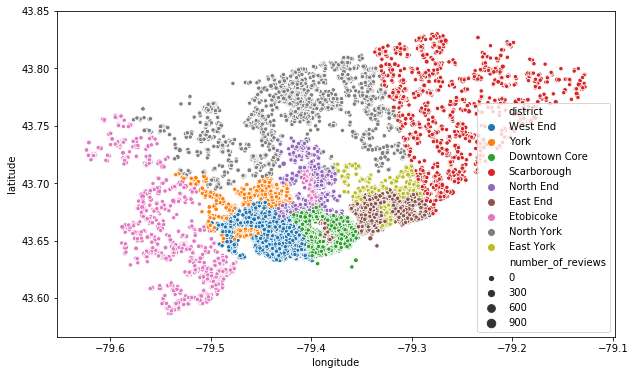

In [39]:

#Visualization of bookings in the Toronto map (according on latitude and longitude columns)
# We can't see weighted map for full toronto easily

plt.figure(figsize=(10,6))
sns.scatterplot(listing.longitude,listing.latitude,data=listing,size=listing.number_of_reviews,hue=listing.district)
plt.ioff()


Now here we can see adverts by their popularity with number of reviews weights..

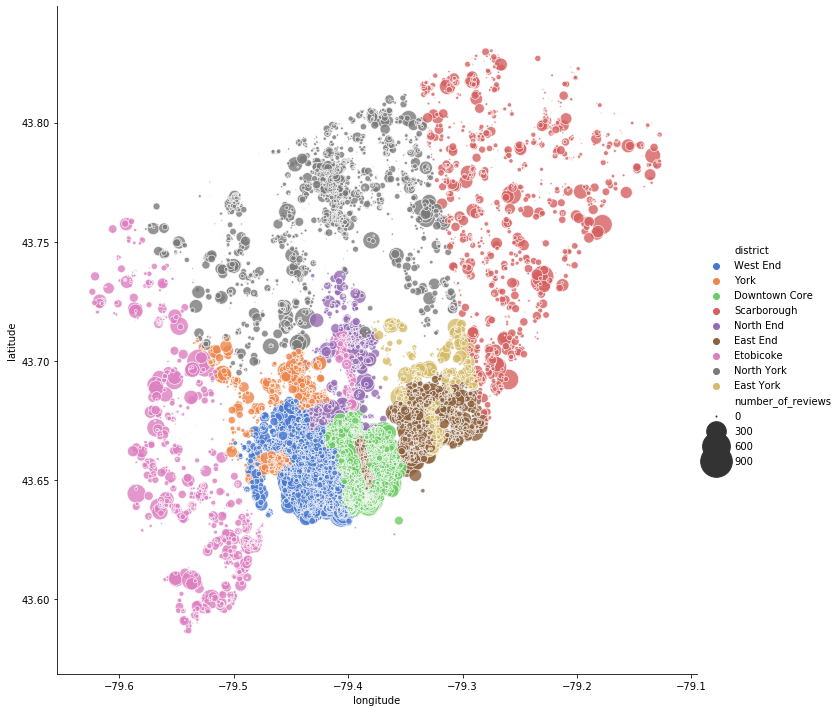

In [40]:
# Relplot is easier library to see it.. But still not enough!

sns.relplot(x="longitude", y="latitude", hue="district", size="number_of_reviews",
            sizes=(1, 1000), alpha=.8, palette="muted",
            height=10, data=listing)

It will be better if we will look closely to the map by district since we have most of the intencity on 1 or 2 districts..

For this, we need to specify-explore which districts have more demand compering to the others.

In [41]:
numreviews=listing.groupby('district').sum()
numreviews.index.name=None
numreviews.index

Index(['Downtown Core', 'East End', 'East York', 'Etobicoke', 'North End',
       'North York', 'Scarborough', 'West End', 'York'],
      dtype='object')

In [42]:
# I want to boxplot the data to see the distribution of reviews

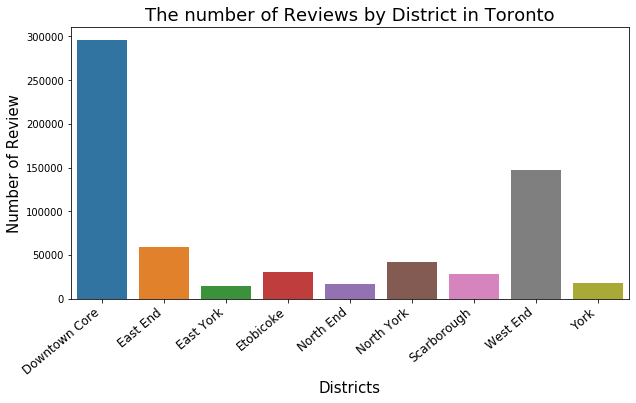

In [43]:
#Show number of adverts by district
plt.figure(figsize = (10, 5))
ax = sns.barplot(x=numreviews.index, y='number_of_reviews', data=numreviews)
ax.set_xlabel('Districts', weight='normal', size=15)
ax.set_ylabel('Number of Review', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=12)
plt.title('The number of Reviews by District in Toronto', fontsize=18)

plt.show()


As we see, more than %75 percent of reviews belongs to Downtown Core & West End regions.

Lets visualize it on map for see district popular area more closely..

In [44]:
downtown=listing[(listing['district'] == "Downtown Core" )]

westend=listing[(listing['district'] == "West End" )]

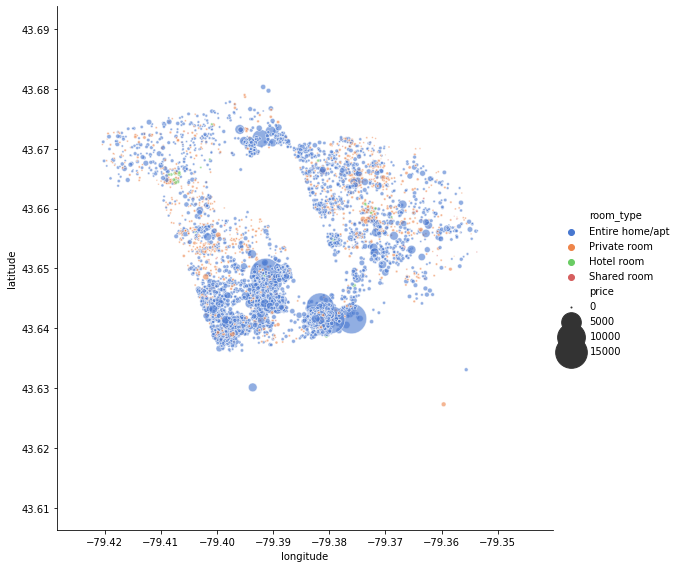

In [45]:
# DOWNTOWN MAP BY ROOM TYPE - PRICE

sns.relplot(x="longitude", y="latitude", hue="room_type", size="price",
            sizes=(1 , 1000), alpha=.6, palette="muted",
            height=8, data=downtown)

For Downtown, it seems southern west is more popular area.. We can assume that most activities centered around here. 

### WEST END MAP BY ROOM TYPE - PRICE


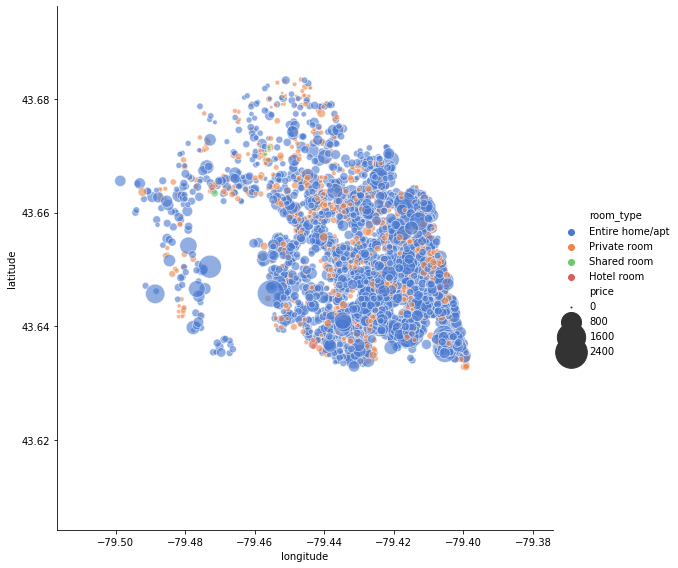

In [46]:

sns.relplot(x="longitude", y="latitude", hue="room_type", size="price",
            sizes=(1 , 1000), alpha=.6, palette="muted",
            height=8, data=westend)


For Westend, south seems more solid.. You can consider this information when you choose your flat.  

This two districts we looked at are the most popular districts.

For me it is good to see popular areas of specific regions since we have options to choose place with searching on map.



Now lets look at the room type data and use it with height map.

We can also see distribution by room type on height map.

### Show number and type of rooms by neighbourhood

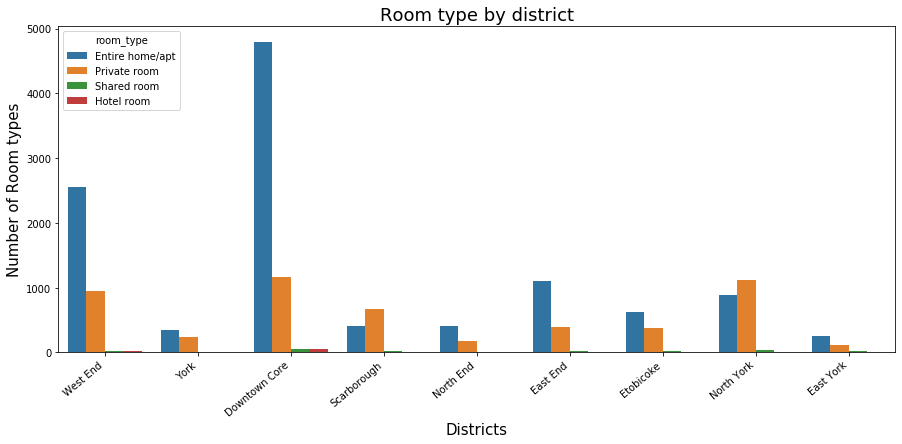

In [47]:

plt.figure(figsize = (15, 6))
ax = sns.countplot(x='district', hue='room_type', data=listing)

#set the axes
ax.set_xlabel('Districts', weight='normal', size=15)
ax.set_ylabel('Number of Room types', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.title('Room type by district', fontsize=18)

plt.show()

In [48]:
westend_entire=listing[(listing["room_type"]=="Entire home/apt") & (listing['district'] == "West End" )]
westend_private=listing[(listing["room_type"]=="Private room") & (listing['district'] == "West End" )]
downtown_entire=listing[(listing["room_type"]=="Entire home/apt") & (listing['district'] == "Downtown Core" )]
downtown_private=listing[(listing["room_type"]=="Private room") & (listing['district'] == "Downtown Core" )]

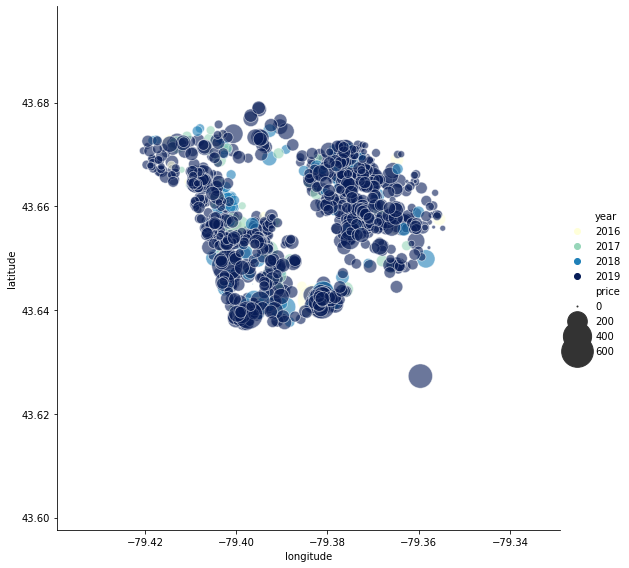

In [49]:

sns.relplot(x="longitude", y="latitude", hue="year", size="price",
            sizes=(1 , 1000), alpha=.6, palette="YlGnBu",
            height=8, data=downtown_private)

In [50]:
westend_entire=listing[(listing["room_type"]=="Entire home/apt") & (listing['district'] == "West End" )]
downtown_entire=listing[(listing["room_type"]=="Entire home/apt") & (listing['district'] == "Downtown Core" )]

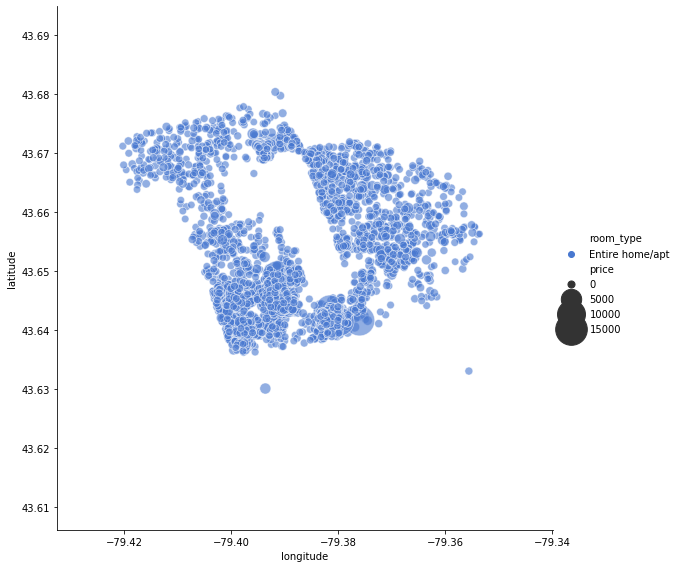

In [51]:
sns.relplot(x="longitude", y="latitude", hue="room_type", size="price",
            sizes=(50 , 1000), alpha=.6, palette="muted",
            height=8, data=downtown_entire)

# This map shows 'Entire Home/Apt by price' for Downtown Core..

In [52]:
listing.head()

,id,host_id,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,1419,1565,West End,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,2017-12-04,0.13,1,0,2017,12,4
3,23691,93825,York,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,1,215,2019-10-27,1.85,2,13,2019,10,27
4,26654,113345,Downtown Core,Waterfront Communities-The Island,43.64530,-79.38940,Entire home/apt,199,4,38,2019-08-17,0.35,7,336,2019,8,17
7,40456,174063,West End,South Parkdale,43.63532,-79.44049,Entire home/apt,99,28,109,2019-11-08,0.96,3,273,2019,11,8
8,41887,183071,Scarborough,Oakridge,43.69466,-79.28667,Entire home/apt,69,2,82,2019-09-02,2.22,2,0,2019,9,2


In [53]:
zz=listing.groupby('district').mean()

In [54]:
zz

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
district,,,,,,,,,,,,,
Downtown Core,2.425642e+07,9.562687e+07,43.651579,-79.388131,180.624318,4.931348,49.021175,2.756141,6.956493,115.200827,2018.752523,9.693962,15.265674
East End,2.210670e+07,8.403986e+07,43.668517,-79.346097,134.745370,5.787037,39.118386,2.022619,3.644180,125.806878,2018.713624,9.593915,15.224206
East York,2.388441e+07,8.983908e+07,43.690221,-79.327317,109.335878,4.753181,35.625954,1.885674,2.875318,124.150127,2018.773537,9.412214,16.027990
Etobicoke,2.507772e+07,1.110897e+08,43.656766,-79.513885,111.978516,5.155273,29.305664,1.920303,3.116211,130.738281,2018.771484,9.402344,14.977539
North End,2.245203e+07,8.174435e+07,43.698918,-79.401993,131.824793,6.636364,27.575207,1.506463,2.885950,129.163636,2018.685950,9.261157,15.735537
North York,2.605176e+07,1.232541e+08,43.762209,-79.416042,93.727362,5.863189,20.424213,1.455659,6.911417,143.615650,2018.812992,9.326280,15.791339
Scarborough,2.542605e+07,1.272683e+08,43.764135,-79.260590,77.750906,5.111413,25.412138,1.525272,4.527174,171.971014,2018.839674,9.368659,15.603261
West End,2.134784e+07,6.944086e+07,43.650988,-79.428643,130.329382,4.951454,41.371154,1.954121,3.117415,112.208016,2018.682190,9.360994,15.230596
York,2.332800e+07,8.821904e+07,43.680595,-79.461622,104.595960,7.234007,30.558923,1.630606,2.771044,133.794613,2018.742424,9.228956,16.067340


# Prices According to Room Type

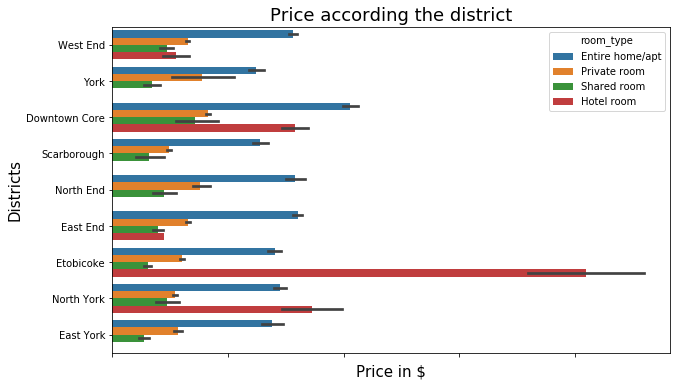

In [55]:
plt.figure(figsize = (10, 6))
#Draw plot
ax = sns.barplot('price', 'district',data=listing, ci=80,hue='room_type')
#Set the axes
ax.set_xlabel('Price in $', weight='normal', size=15)
ax.set_ylabel('Districts', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size= 12)
#Set tittle
plt.title('Price according the district', fontsize=18)
#Show plot
plt.show()

### Mean Prices by Room Type for Entire City

In [56]:
mean_prices_by_room_type=listing.groupby('room_type').mean()
mean_prices_by_room_type.index.name=None
mean_prices_by_room_type

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
Entire home/apt,2.372168e+07,9.195728e+07,43.667539,-79.398026,173.267434,5.655015,42.314597,2.364576,5.005621,120.071930,2018.746004,9.605744,15.200949
Hotel room,2.477358e+07,9.873065e+07,43.650625,-79.413116,165.730769,2.410256,31.128205,2.005513,14.730769,239.807692,2018.974359,9.435897,16.653846
Private room,2.354716e+07,9.998451e+07,43.699311,-79.395639,65.122716,4.547221,31.015195,1.635895,4.815349,132.087902,2018.744374,9.255434,15.753222
Shared room,2.516247e+07,9.784230e+07,43.699938,-79.383624,46.841270,4.772487,26.402116,1.519894,11.555556,177.571429,2018.708995,9.269841,15.862434


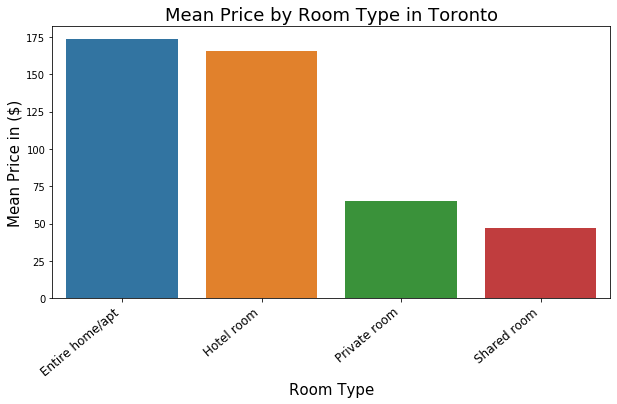

In [58]:
#Show number of adverts by district
plt.figure(figsize = (10, 5))
ax = sns.barplot(x=mean_prices_by_room_type.index, y='price', data=mean_prices_by_room_type)
ax.set_xlabel('Room Type', weight='normal', size=15)
ax.set_ylabel('Mean Price in ($)', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=12)
plt.title('Mean Price by Room Type in Toronto', fontsize=18)

plt.show()


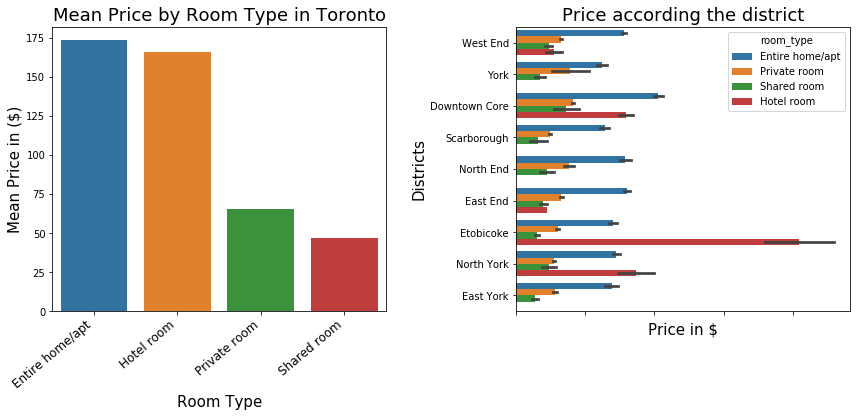

In [59]:
fig = plt.figure(figsize = (12, 10))

plt.subplot(2, 2, 1)
ax = sns.barplot(x=mean_prices_by_room_type.index, y='price', data=mean_prices_by_room_type)
ax.set_xlabel('Room Type', weight='normal', size=15)
ax.set_ylabel('Mean Price in ($)', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=12)
plt.title('Mean Price by Room Type in Toronto', fontsize=18)


plt.subplot(2, 2, 2)
ax = sns.barplot('price', 'district',data=listing, ci=80,hue='room_type')
#Set the axes
ax.set_xlabel('Price in $', weight='normal', size=15)
ax.set_ylabel('Districts', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size= 12)
#Set tittle
plt.title('Price according the district', fontsize=18)
#Show plot

plt.tight_layout()
plt.show()

We also can define this subplot as a function since they have common parts. We can this functions for further data wranglings

In [60]:
def create_subplot(data1, data2,figsize=(12,10), size=12, fontsize=15 ):
    
    fig = plt.figure(figsize = (12, 10))
    list1=[1,2]
    
    for i in list1:
        plt.subplot(2,2,i)
        
        if i==1:
            ax=sns.barplot(x=data1.index, y='price', data=data1)
            #Set the axes            
            ax.set_xlabel('Room Type',size=size, weight='normal')
            ax.set_ylabel('Mean Price in ($)',size=size, weight='normal')
            #Set tittle
            plt.title('Mean Price by Room Type in Toronto', fontsize=fontsize)
            continue
            
        if i==2:
            ax = sns.barplot('price', 'district',data=data2, ci=80,hue='room_type')
            #Set the axes
            ax.set_xlabel('Price in $', size=size, weight='normal')
            ax.set_ylabel('Districts', size=size, weight='normal')
            #Set tittle
            plt.title('Price according the district', fontsize=fontsize)
            
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=size)
        plt.tight_layout()
        plt.show()

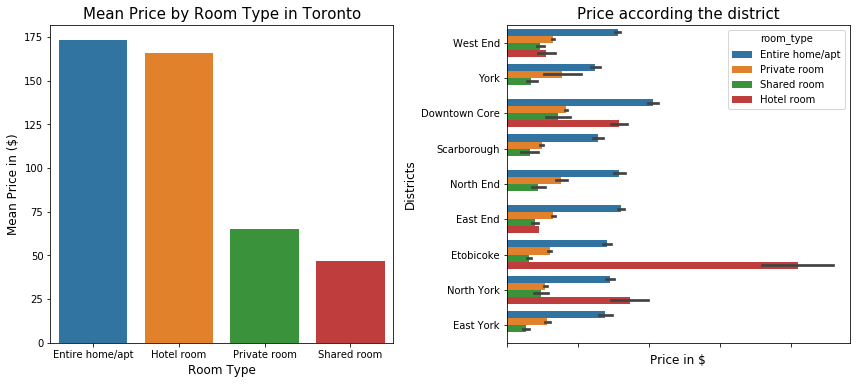

In [61]:
create_subplot(mean_prices_by_room_type,listing)

# Prices & Reviews Comperition by Month for 2018-2019

In [62]:
year2019=listing[listing['year']==2019]
year2018=listing[listing['year']==2018]

In [63]:
month_sum_2019=year2019.groupby('month').sum()
month_mean_2019=year2019.groupby('month').mean()
month_sum_2018=year2018.groupby('month').sum()
month_mean_2018=year2018.groupby('month').mean()

In [64]:
month_sum_2019

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,day
month,,,,,,,,,,,,
1,3608076133,13705131969,7776.42091,-14132.574700,20512,1230,2916,104.36,807,15752,359382,1901
2,2583071415,10282422773,5154.99844,-9369.062880,13759,784,2031,78.15,896,12450,238242,1959
3,2708154086,9906322635,5634.30618,-10242.762790,17988,1161,2650,90.09,590,14233,260451,2221
4,3846567812,15160864055,8037.00617,-14609.112010,21535,1817,3355,122.49,1169,23498,371496,2958
5,4312974171,15178647827,8823.34383,-16038.762950,38231,1303,4076,158.07,1774,23345,407838,3823
6,6910324636,25462396959,13367.77054,-24293.872150,37051,2737,5298,220.74,2202,40053,617814,5175
7,9120044464,33464188074,18260.14911,-33187.301210,61028,3143,7538,315.63,2842,53972,843942,7276
8,30597449969,110809221579,58011.63655,-105441.268970,200390,8127,25651,1218.41,7033,169476,2681232,24074
9,38123940790,142948033779,69413.41335,-126163.242030,216566,7673,37694,1866.66,9081,220366,3208191,24487


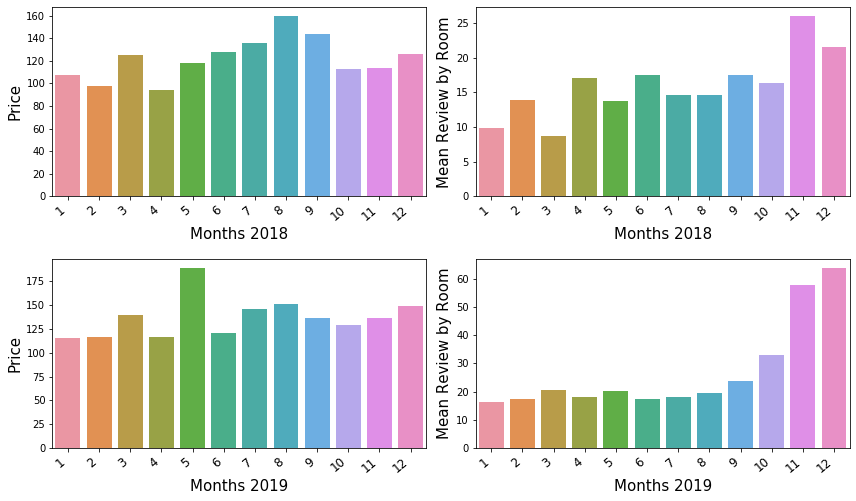

In [65]:

fig = plt.figure(figsize = (12, 10))

plt.subplot(3, 2, 1)
ax = sns.barplot(x=month_mean_2018.index, y='price', data=month_mean_2018)
ax.set_xlabel('Months 2018', weight='normal', size=15)
ax.set_ylabel('Price', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=12)


plt.subplot(3, 2, 2)
ax = sns.barplot(x=month_sum_2018.index, y='number_of_reviews', data=month_mean_2018)
ax.set_xlabel('Months 2018', weight='normal', size=15)
ax.set_ylabel('Mean Review by Room', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=12)



plt.subplot(3, 2, 3)
ax = sns.barplot(x=month_mean_2019.index, y='price', data=month_mean_2019)
ax.set_xlabel('Months 2019', weight='normal', size=15)
ax.set_ylabel('Price', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=12)


plt.subplot(3, 2, 4)
ax = sns.barplot(x=month_sum_2019.index, y='number_of_reviews', data=month_mean_2019)
ax.set_xlabel('Months 2019', weight='normal', size=15)
ax.set_ylabel('Mean Review by Room', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=12)


plt.tight_layout()
plt.show()